# Цели проекта


Этот набор данных содержит комплексную коллекцию признаков, извлеченных из URL-адресов, предназначенных для облегчения обнаружения и анализа фишинговых доменов. Благодаря разнообразному набору переменных, охватывающих различные аспекты структуры и характеристик URL-адресов, набор данных предлагает ценную информацию об атрибутах, обычно связанных с фишинговой деятельностью. От количества символов и знаков в URL-адресах до свойств домена и каталога, а также параметров и информации, связанной с сервером можно определить оригинальный сайт или копия

## Содержимое:

1.qty_dot_domain: Количество точек в домене.

2.qty_hyphen_domain: Количество дефисов в домене.

3.qty_underline_domain: Количество подчеркиваний в домене.

4.qty_slash_domain: Количество слешей в домене.

5.qty_questionmark_domain: Количество вопросительных знаков в домене.

6.qty_equal_domain: Количество знаков равенства в домене.

7.qty_at_domain: Количество символов «@» в домене.

8.qty_and_domain: Количество символов «&» в домене.

9.qty_exclamation_domain: Количество восклицательных знаков в домене.

10.qty_space_domain: Количество мест в домене.

11.qty_tilde_domain: Количество тильд в домене.

12.qty_comma_domain: Количество запятых в домене.

13.qty_plus_domain: Количество знаков «плюс» в домене.

14.qty_asterisk_domain: Количество звездочек в домене.

15.qty_hashtag_domain: Количество хэштегов в домене.

16.qty_dollar_domain: Количество знаков доллара в домене.

17.qty_percent_domain: Количество знаков процента в домене.

18.qty_vowels_domain: Количество гласных в домене.

19.domain_length: Длина домена.

20.domain_in_ip: Домен в IP.

21.server_client_domain: Клиент-сервер в домене.
22. Фишинг

# Обработка данных

In [1]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/sample_data/dataset_cybersecurity_michelle.csv')
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,...,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,...,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,...,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,...,1,2,1,299,1,1,0,0,0,0


In [4]:
df.shape

(129698, 112)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB


0 – безопасный (легитимный) домен/URL.

1 – фишинговый (злоумышленный) домен/URL.

In [ ]:
df['phishing'].value_counts()


,count
phishing,
0,77546
1,52152


In [6]:
#разделяем 112 столбцов на отдельные категории
df_url = df[[col for col in df.columns if "_url" in col] + ["phishing"]]
df_domain = df[[col for col in df.columns if "_domain" in col] + ["phishing","domain_length"]]
df_directory = df[[col for col in df.columns if "_directory" in col] + ["phishing"]]
df_file = df[[col for col in df.columns if "_file" in col] + ["phishing"]]
df_params = df[[col for col in df.columns if "_params" in col] + ["phishing"]]

Будем работать с domain

In [ ]:
df_domain.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,...,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,server_client_domain,time_domain_activation,time_domain_expiration,phishing,domain_length
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1640,551,1,7
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,-1,-1,1,24
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,5355,123,0,24
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,-1,-1,1,17
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,7865,1631,0,23


In [ ]:
df_domain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   qty_dot_domain           129698 non-null  int64
 1   qty_hyphen_domain        129698 non-null  int64
 2   qty_underline_domain     129698 non-null  int64
 3   qty_slash_domain         129698 non-null  int64
 4   qty_questionmark_domain  129698 non-null  int64
 5   qty_equal_domain         129698 non-null  int64
 6   qty_at_domain            129698 non-null  int64
 7   qty_and_domain           129698 non-null  int64
 8   qty_exclamation_domain   129698 non-null  int64
 9   qty_space_domain         129698 non-null  int64
 10  qty_tilde_domain         129698 non-null  int64
 11  qty_comma_domain         129698 non-null  int64
 12  qty_plus_domain          129698 non-null  int64
 13  qty_asterisk_domain      129698 non-null  int64
 14  qty_hashtag_domain       129698 non-

In [7]:
range_per_column = df_domain.max() - df_domain.min()
print(range_per_column)
#посчитали диапозон значений
#видим то что у многих столбцов 0

qty_dot_domain                21
qty_hyphen_domain             11
qty_underline_domain           3
qty_slash_domain               0
qty_questionmark_domain        0
qty_equal_domain               0
qty_at_domain                  1
qty_and_domain                 0
qty_exclamation_domain         0
qty_space_domain               0
qty_tilde_domain               0
qty_comma_domain               0
qty_plus_domain                0
qty_asterisk_domain            0
qty_hashtag_domain             0
qty_dollar_domain              0
qty_percent_domain             0
qty_vowels_domain             61
server_client_domain           1
time_domain_activation     17776
time_domain_expiration     22575
phishing                       1
domain_length                227
dtype: int64


In [8]:
filtered_domain = df_domain.loc[:, range_per_column > 0]
#cоздаем новый датасет, где значения больше нуля.
# Также в целом в доменном имени не могут использоваться хэштеги,слэши и т.д

In [9]:
filtered_domain.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,server_client_domain,time_domain_activation,time_domain_expiration,phishing,domain_length
0,1,0,0,0,1,0,1640,551,1,7
1,2,0,0,0,8,0,-1,-1,1,24
2,2,0,0,0,7,0,5355,123,0,24
3,1,1,0,0,5,0,-1,-1,1,17
4,2,1,0,0,6,0,7865,1631,0,23


In [10]:
filtered_domain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   qty_dot_domain          129698 non-null  int64
 1   qty_hyphen_domain       129698 non-null  int64
 2   qty_underline_domain    129698 non-null  int64
 3   qty_at_domain           129698 non-null  int64
 4   qty_vowels_domain       129698 non-null  int64
 5   server_client_domain    129698 non-null  int64
 6   time_domain_activation  129698 non-null  int64
 7   time_domain_expiration  129698 non-null  int64
 8   phishing                129698 non-null  int64
 9   domain_length           129698 non-null  int64
dtypes: int64(10)
memory usage: 9.9 MB


In [11]:
grouped = filtered_domain.groupby('phishing').agg([ 'min', 'max'])

In [12]:
print("Групповая статистика:\n", grouped)
#Видим, то что у фишинговых доменов слишком много точек, много дефисов,
#много гласных букв,и длина домена тоже больше.

Групповая статистика:
          qty_dot_domain     qty_hyphen_domain     qty_underline_domain      \
                    min max               min max                  min max   
phishing                                                                     
0                     0   6                 0   6                    0   3   
1                     0  21                 0  11                    0   2   

         qty_at_domain     qty_vowels_domain     server_client_domain      \
                   min max               min max                  min max   
phishing                                                                    
0                    0   0                 0  23                    0   1   
1                    0   1                 0  61                    0   1   

         time_domain_activation        time_domain_expiration         \
                            min    max                    min    max   
phishing                                                

In [13]:
filtered_domain[['time_domain_activation', 'time_domain_expiration']].isin([-1]).sum()
#в результате предидущего запроса можно увидеть ,
# то что у этих двух столбцов минимальное
# значение -1,
# и кажется это вместо пустых значений поставили


,0
time_domain_activation,37520
time_domain_expiration,40622


In [ ]:
filtered_domain[filtered_domain['phishing'] == 0][['time_domain_activation', 'time_domain_expiration']].isin([-1]).sum()


,0
time_domain_activation,19038
time_domain_expiration,21440


In [ ]:
filtered_domain[filtered_domain['phishing'] == 1][['time_domain_activation', 'time_domain_expiration']].isin([-1]).sum()


,0
time_domain_activation,18482
time_domain_expiration,19182


In [14]:
# Заменяем -1 на медиану
median_activation = filtered_domain.loc[filtered_domain['time_domain_activation'] != -1, 'time_domain_activation'].median()
median_expiration = filtered_domain.loc[filtered_domain['time_domain_expiration'] != -1, 'time_domain_expiration'].median()

filtered_domain.loc[:, 'time_domain_activation'] = filtered_domain['time_domain_activation'].replace(-1, median_activation)
filtered_domain.loc[:, 'time_domain_expiration'] = filtered_domain['time_domain_expiration'].replace(-1, median_expiration)


In [15]:
filtered_domain.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,server_client_domain,time_domain_activation,time_domain_expiration,phishing,domain_length
0,1,0,0,0,1,0,1640,551,1,7
1,2,0,0,0,8,0,4668,275,1,24
2,2,0,0,0,7,0,5355,123,0,24
3,1,1,0,0,5,0,4668,275,1,17
4,2,1,0,0,6,0,7865,1631,0,23


In [16]:
(filtered_domain['time_domain_expiration'] < filtered_domain['time_domain_activation']).sum()
# смотрим сколько записей , где значения
# активации больше чем время истекания
# домена, в результате вышло большое число и это скорее всего ошибка



124577

In [17]:
filtered_domain = filtered_domain.copy()  # Это уберёт предупреждение

mask = filtered_domain['time_domain_expiration'] < filtered_domain['time_domain_activation']

# Меняем местами, где даты перепутаны
filtered_domain.loc[mask, ['time_domain_activation', 'time_domain_expiration']] = \
    filtered_domain.loc[mask, ['time_domain_expiration', 'time_domain_activation']].values

# Теперь правильно считаем domain_lifetime
filtered_domain['domain_lifetime'] = filtered_domain['time_domain_expiration'] - filtered_domain['time_domain_activation']


In [18]:
(filtered_domain['time_domain_expiration'] < filtered_domain['time_domain_activation']).sum()
#проверяем

0

In [19]:
filtered_domain.drop(columns=['time_domain_activation', 'time_domain_expiration'], inplace=True)
filtered_domain.head()
#удаляем эти два столбца, так как посчитали новый столбец срок жизни домена

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,server_client_domain,phishing,domain_length,domain_lifetime
0,1,0,0,0,1,0,1,7,1089
1,2,0,0,0,8,0,1,24,4393
2,2,0,0,0,7,0,0,24,5232
3,1,1,0,0,5,0,1,17,4393
4,2,1,0,0,6,0,0,23,6234


In [20]:
filtered_domain.describe()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,server_client_domain,phishing,domain_length,domain_lifetime
count,129698.000000,129698.000000,129698.000000,129698.000000,129698.000000,129698.000000,129698.000000,129698.000000,129698.000000
mean,1.847954,0.120303,0.000617,0.000008,5.439444,0.004194,0.402103,18.402365,4074.406668
std,0.738412,0.436292,0.029380,0.002777,2.595725,0.064628,0.490324,6.838128,2131.918146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,14.000000,2584.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,17.000000,4393.000000
75%,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,22.000000,5397.000000
max,21.000000,11.000000,3.000000,1.000000,61.000000,1.000000,1.000000,231.000000,17500.000000


In [21]:
filtered_domain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   qty_dot_domain        129698 non-null  int64
 1   qty_hyphen_domain     129698 non-null  int64
 2   qty_underline_domain  129698 non-null  int64
 3   qty_at_domain         129698 non-null  int64
 4   qty_vowels_domain     129698 non-null  int64
 5   server_client_domain  129698 non-null  int64
 6   phishing              129698 non-null  int64
 7   domain_length         129698 non-null  int64
 8   domain_lifetime       129698 non-null  int64
dtypes: int64(9)
memory usage: 8.9 MB


Также я заметила столбец server_client_domain и не поняла его значимость, у него так же значения только 0 и 1, поэтому решила проверить :

In [22]:
# Считаем количество фишинговых (phishing = 1) и безопасных (phishing = 0) для каждого типа server_client_domain
print(df.groupby(["server_client_domain", "phishing"]).size())


server_client_domain  phishing
0                     0           77251
                      1           51903
1                     0             295
                      1             249
dtype: int64


77 251 доменов безопасны и не содержат "server"/"client".

51 903 домена являются фишинговыми и не содержат "server"/"client".

295 доменов безопасны и содержат "server"/"client".

249 доменов фишинговые и содержат "server"/"client".

Вывод:
Столбец server_client_domain = 1 встречается очень редко (всего 544 случая из 120 000+ строк).
Фишинговых доменов в обеих группах почти поровну (~50%), то есть этот столбец не сильно влияет на вероятность фишинга.

In [23]:
filtered_domain.drop(columns=['server_client_domain'], inplace=True)
filtered_domain.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,phishing,domain_length,domain_lifetime
0,1,0,0,0,1,1,7,1089
1,2,0,0,0,8,1,24,4393
2,2,0,0,0,7,0,24,5232
3,1,1,0,0,5,1,17,4393
4,2,1,0,0,6,0,23,6234


In [24]:
filtered_domain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   qty_dot_domain        129698 non-null  int64
 1   qty_hyphen_domain     129698 non-null  int64
 2   qty_underline_domain  129698 non-null  int64
 3   qty_at_domain         129698 non-null  int64
 4   qty_vowels_domain     129698 non-null  int64
 5   phishing              129698 non-null  int64
 6   domain_length         129698 non-null  int64
 7   domain_lifetime       129698 non-null  int64
dtypes: int64(8)
memory usage: 7.9 MB


# Визуализация:

1. Какое в среднем срок жизни домена у фишинговых и безопасных сайтов?
2. Как отличаются длина домена у фишинговых и безопасных сайтов ?
3. Как данные коррелируют друг с другом

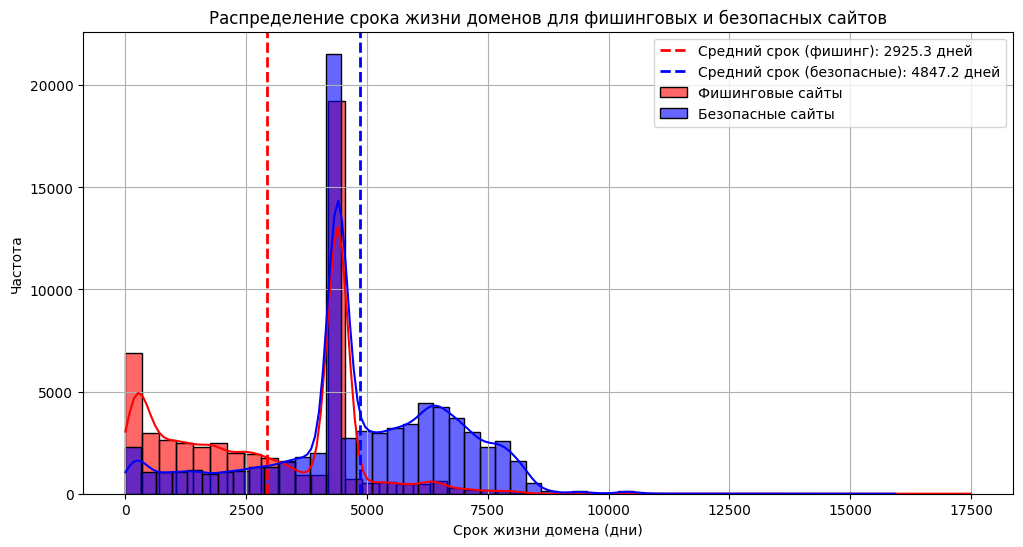

In [ ]:
# Разделяем данные
phishing_lifetime = filtered_domain[filtered_domain["phishing"] == 1]["domain_lifetime"]
safe_lifetime = filtered_domain[filtered_domain["phishing"] == 0]["domain_lifetime"]

# Визуализация
plt.figure(figsize=(12, 6))
sns.histplot(phishing_lifetime, bins=50, color='red', label="Фишинговые сайты", alpha=0.6, kde=True)
sns.histplot(safe_lifetime, bins=50, color='blue', label="Безопасные сайты", alpha=0.6, kde=True)

# Средние значения
plt.axvline(phishing_lifetime.mean(), color='red', linestyle='dashed', linewidth=2, label=f"Средний срок (фишинг): {phishing_lifetime.mean():.1f} дней")
plt.axvline(safe_lifetime.mean(), color='blue', linestyle='dashed', linewidth=2, label=f"Средний срок (безопасные): {safe_lifetime.mean():.1f} дней")

plt.xlabel("Срок жизни домена (дни)")
plt.ylabel("Частота")
plt.title("Распределение срока жизни доменов для фишинговых и безопасных сайтов")
plt.legend()
plt.grid(True)

# Показываем график
plt.show()


Этот график подтверждает, то что у фишинговых сайтов , срок жизни меньше , чем у безопасных сайтов. Так как фишинговые сайты всегда быстро открываются и закрываются и работают не долго.

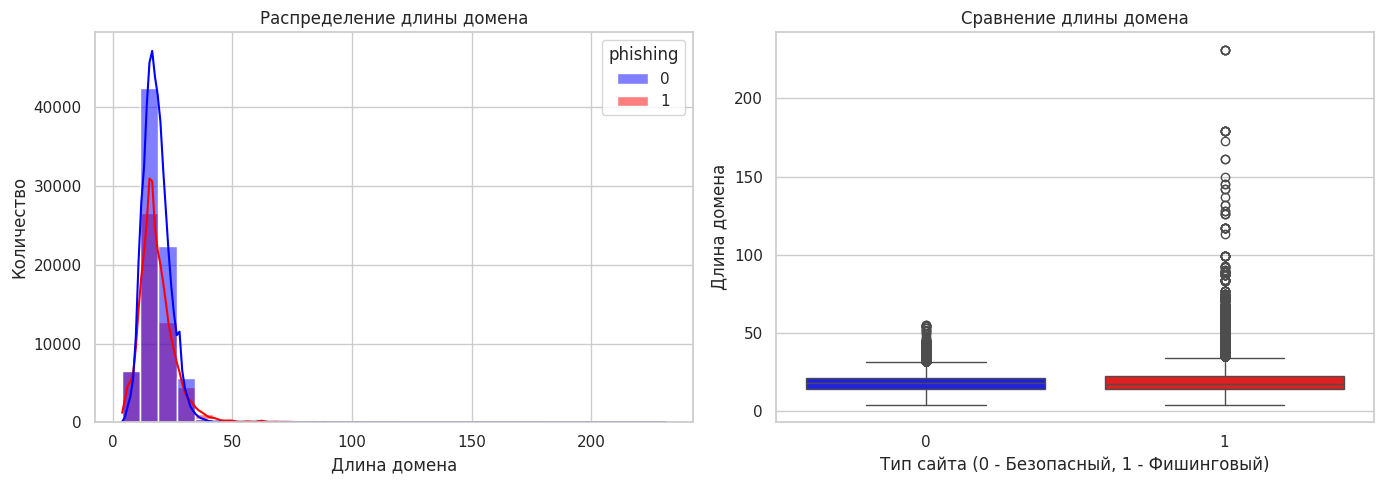

In [ ]:
# Настройка стиля
sns.set(style="whitegrid")

# Создание фигуры с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма распределения длины домена
sns.histplot(df, x="domain_length", hue="phishing", bins=30, kde=True, ax=axes[0], palette={0: "blue", 1: "red"})
axes[0].set_title("Распределение длины домена")
axes[0].set_xlabel("Длина домена")
axes[0].set_ylabel("Количество")

# Boxplot для сравнения длины доменов (исправлено)
sns.boxplot(x="phishing", y="domain_length", data=df, ax=axes[1], hue="phishing", dodge=False, legend=False, palette={0: "blue", 1: "red"})
axes[1].set_title("Сравнение длины домена")
axes[1].set_xlabel("Тип сайта (0 - Безопасный, 1 - Фишинговый)")
axes[1].set_ylabel("Длина домена")

plt.tight_layout()
plt.show()



В этом графике, можно увидеть то что у безопасных сайтов длина домена около 50 , а у фишинговых больше

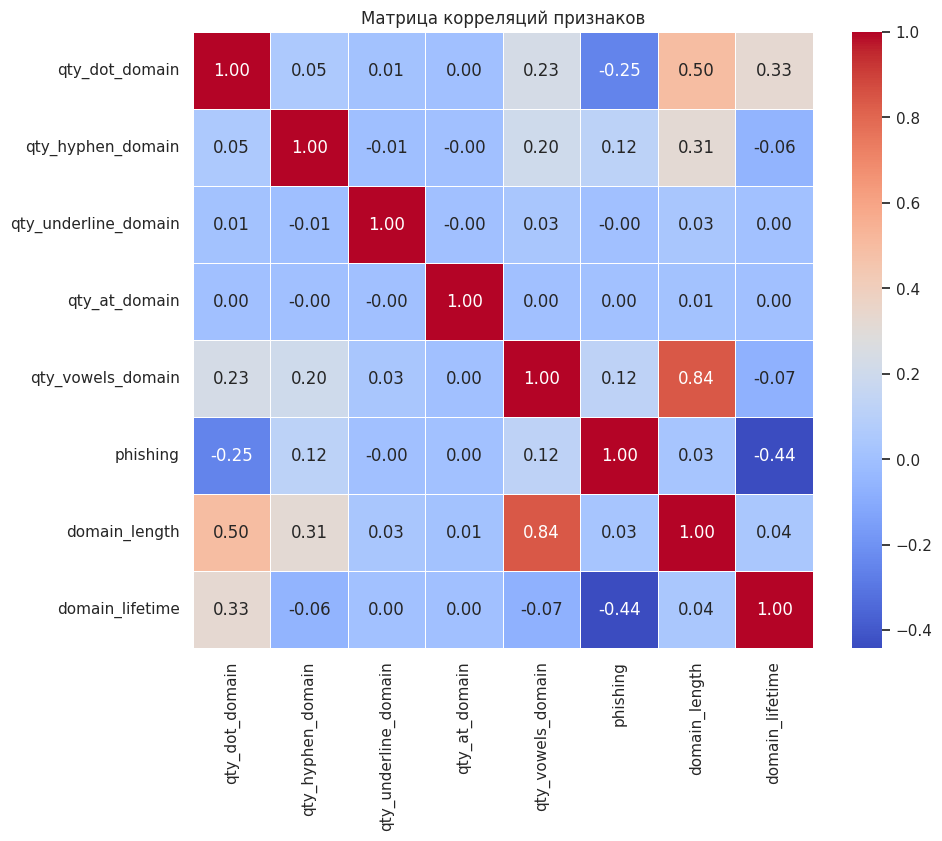

In [ ]:
# Строим матрицу корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_domain.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Матрица корреляций признаков")
plt.show()


Тут можно увидеть, то что количество гласных в домене, количество точек в домене и длина домена сильно коррелируют друг с другом

# Splitting Data

In [25]:
filtered_domain.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,phishing,domain_length,domain_lifetime
0,1,0,0,0,1,1,7,1089
1,2,0,0,0,8,1,24,4393
2,2,0,0,0,7,0,24,5232
3,1,1,0,0,5,1,17,4393
4,2,1,0,0,6,0,23,6234


У domain_lifetime очень большой диапозон , по сравнению с остальными, но Random Forest НЕ чувствителен к масштабу данных. Поэтому не буду кодировать или масштабировать данные.

In [26]:
X = filtered_domain.drop(['phishing'], axis = 1)
y = filtered_domain['phishing']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [29]:
X_train.shape, X_test.shape

((90788, 7), (38910, 7))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc,recall_score

In [ ]:
print(f1_score(y_test,y_pred))

0.8368615265100019


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     23226
           1       0.85      0.82      0.84     15684

    accuracy                           0.87     38910
   macro avg       0.87      0.86      0.86     38910
weighted avg       0.87      0.87      0.87     38910



In [ ]:
print(recall_score(y_test,y_pred))

0.8242157612853864


<Axes: >

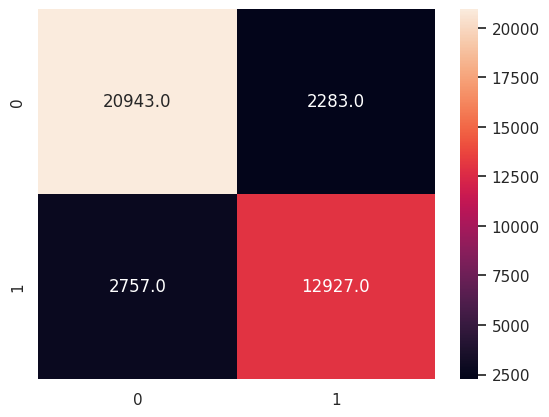

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = '.1f')

✔️20 943 раз модель правильно определила не фишинг.

✔️ 12 927 раз модель правильно определила фишинг.

❌ 2757 раз модель пропустила фишинговый сайт.

❌ 2283 раз модель ошибочно приняла безопасный сайт за фишинговый.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test,y_pred)

roc_curve = auc(fpr, tpr)

roc_auc_score(y_test,y_pred)

0.9406497248255735

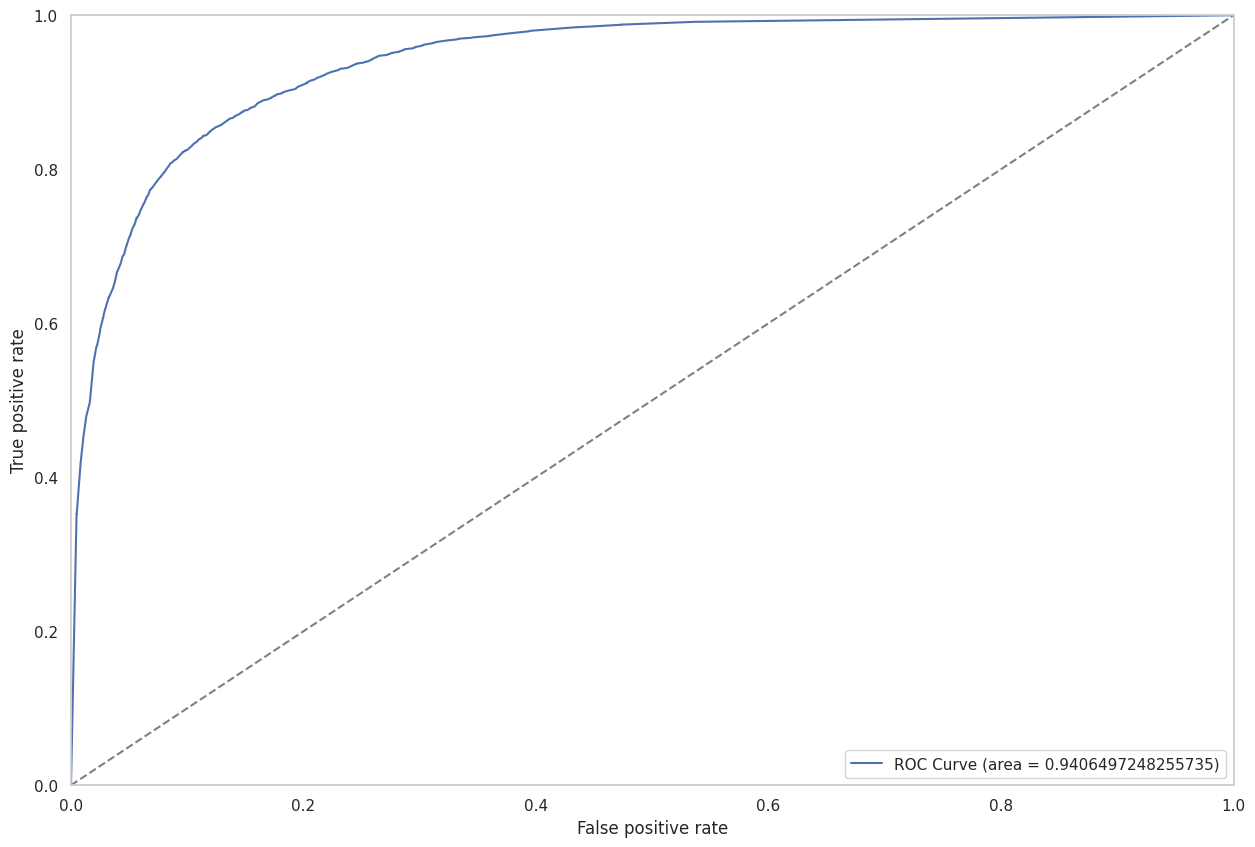

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr, color = 'b', label = f'ROC Curve (area = {roc_curve})')
plt.plot([0,1] , [0,1] , color = 'gray', linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.grid()

# Улучшение модели

Recall показывает: модель на 90 процентов определяет безопасные и на 82 процентов фишинговые сайты.

ROC-AUC показывает: показывает общую способность модели разделять классы на 94%. Он важен , если нужен баланс между True Positive и False Positive.

Из всех этих метрик, нам больше всего важен Recall, потому что лучше блокировать безопасный сайт, подумав что он фишинговый. Чем определить фишинговый сайт, как безопасный.


In [39]:
from sklearn.ensemble import RandomForestClassifier

model_update = RandomForestClassifier(
    n_estimators=100,  # Больше деревьев
    max_depth=None,  # Деревья могут расти до упора
    min_samples_split=2,  # Разбиение, если >=2 образцов в узле
    class_weight='balanced',  # Учитывает дисбаланс классов
    random_state=42
)


In [40]:
model_update.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
y_pred = model_update.predict(X_test)

In [42]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report, recall_score,roc_auc_score,roc_curve,auc

In [43]:
print(recall_score(y_test,y_pred))

0.8710788064269319


In [44]:
print(roc_auc_score(y_test,y_pred))

0.8666295607954861


<Axes: >

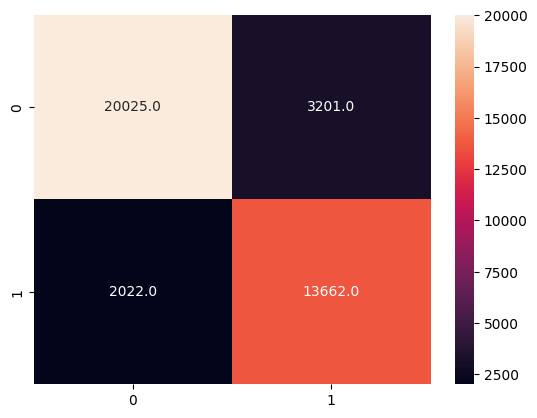

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = '.1f')

✔️Тут модель 20 025  раз модель правильно определила не фишинг. (до этого было 20 943)

✔️ 13 662 раз модель правильно определила фишинг.(до этого было  12 927)

❌ 2022 раз модель пропустила фишинговый сайт. (до этого 2757)

❌ 3201 раз модель ошибочно приняла безопасный сайт за фишинговый. (до этого 2283)



При других параметрах модель теперь определяет на 735 фишинговых сайтов больше, чем раньше.
И поднялся от 82% до 87%. Правда ROC-AUC сильно уменьшился

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     23226
           1       0.81      0.87      0.84     15684

    accuracy                           0.87     38910
   macro avg       0.86      0.87      0.86     38910
weighted avg       0.87      0.87      0.87     38910



# Пробуем GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [ ]:
print("Лучшие параметры:", grid_search.best_params_)


Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


В целом ничего хорошего он не выдал, думаю ошибка в том что я написала глубину 10, что не желательно, но попрбовать стоило

# Итоговая модель

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_update3 = RandomForestClassifier(
    n_estimators=200,  # Больше деревьев
    max_depth= None,  # Деревья могут расти
    min_samples_split=2,  # Разбиение, если >=2 образцов в узле
    class_weight='balanced',  # Учитывает дисбаланс классов
    random_state=42
)


Здесь применили 200 деревьев, вместо 100

In [31]:
model_update3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [32]:
y_pred = model_update3.predict(X_test)

In [33]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report, recall_score,roc_auc_score,roc_curve,auc

In [34]:
print(recall_score(y_test,y_pred))

0.8684646773782199


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     23226
           1       0.81      0.87      0.84     15684

    accuracy                           0.87     38910
   macro avg       0.86      0.87      0.86     38910
weighted avg       0.87      0.87      0.87     38910



In [36]:
print(confusion_matrix(y_test,y_pred))

[[20083  3143]
 [ 2063 13621]]


<Axes: >

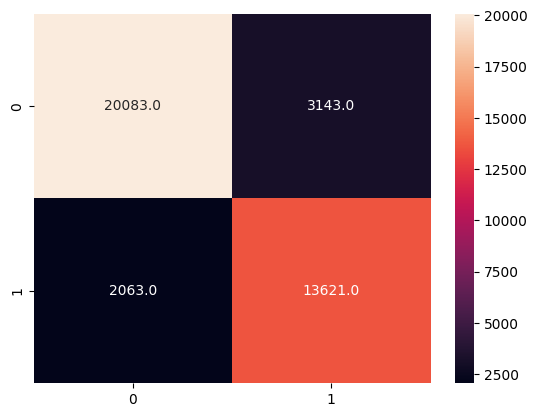

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = '.1f')

In [38]:
print(roc_auc_score(y_test,y_pred))

0.8665710969772353


Оставляем эту модель, так как при этих параметрах, хотя бы F1- score : 89


# Скачиваем готовую модель

In [ ]:
import joblib

joblib.dump(model_update3, 'model_update3.pkl')

['model_update3.pkl']

In [ ]:
import os

file_size = os.path.getsize('model_update3.pkl')

file_size_mb = file_size / (1024 * 1024)

print(f"Размер файла: {file_size_mb:.2f} МБ")

Размер файла: 268.14 МБ


In [ ]:
from google.colab import files

files.download('model_update3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [ ]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.7251606270881521

<Axes: >

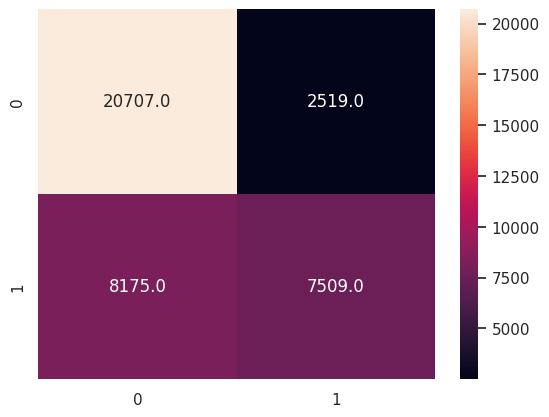

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = '.1f')

✔️20707 раз модель правильно определила не фишинг.

✔️ 7509 раз модель правильно определила фишинг.

❌ 8175 раз модель пропустила фишинговый сайт.

❌ 2519 раз модель ошибочно приняла безопасный сайт за фишинговый.
